# Fetal Health Prediction

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support

1. Preprocess data
    1. Read in data
    1. No need to one hot encode because no categroical data
    1. Coorilate columns one with another
        1. Eliminate unneccary columns
    1. Standardize data
    1. Split into test and train

1. Analysis
    1. Train data
    1. Which varibles do we end up using?
    1. Does Logicsitc regression or linear SVM predict well?
        1. If not, use multidimentional
    1. Test data

## Preprocess data
### Read in data

In [75]:
babyData = pd.read_csv('fetal_health.csv')
babyData.head(5)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


## Correlate features to discover redundancies

In [76]:
threshold = 0.8
corrs = babyData.corr()
for row in corrs.columns:
    temp = corrs.index[(abs(corrs[row])<1) & (abs(corrs[row])>=threshold)]
    if temp.any():
        print(temp)

Index(['histogram_min'], dtype='object')
Index(['histogram_width'], dtype='object')
Index(['histogram_mean', 'histogram_median'], dtype='object')
Index(['histogram_mode', 'histogram_median'], dtype='object')
Index(['histogram_mode', 'histogram_mean'], dtype='object')


### Eliminate redundancies
Since the mode and median of the histogram are correlated, as well as the mean and the median, we omit the mode and mean, as the median will already represent them both.

In [77]:
colsToDelete = ['histogram_width', 'histogram_mean', 'histogram_mode']
babyData = babyData.drop(labels = colsToDelete , axis =1 )

### Standardize data

In [78]:
excludeCols = ['fetal_health']
for col in babyData.columns:
    if col not in excludeCols:
        babyData[col] = (babyData[col] - babyData[col].mean()) / babyData[col].std()
babyData

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,-1.351902,-0.822195,-0.203162,-1.482116,-0.638287,-0.057462,-0.268691,1.512834,-0.942873,1.802118,-1.028318,-1.068311,-2.119093,-0.701232,-0.458336,-1.181364,1.870129,1.112718,2.0
1,-0.132494,0.729961,-0.203162,0.554496,0.375155,-0.057462,-0.268691,-1.744341,0.868636,-0.535235,0.393083,-0.865335,1.893349,0.654983,0.957976,0.132007,-0.234943,-0.524402,1.0
2,-0.030877,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,0.868636,-0.535235,0.926109,-0.865335,1.893349,0.315929,0.957976,-0.006243,-0.200434,-0.524402,1.0
3,0.070740,-0.046117,-0.203162,1.233367,0.375155,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,2.631791,-1.372774,0.332955,2.350251,-0.458336,-0.075367,-0.200434,1.112718,1.0
4,-0.132494,0.988654,-0.203162,1.233367,-0.638287,-0.057462,-0.268691,-1.802504,1.208294,-0.535235,2.080998,-1.372774,0.332955,1.672144,-0.458336,-0.006243,-0.269452,1.112718,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,0.680444,-0.822195,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.282531,0.823691,-0.175477,1.468883,0.723053,-0.023125,-0.458336,0.961504,-0.580037,-0.524402,2.0
2122,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.660620,-0.193245,0.318689,0.277226,0.654983,-0.458336,0.892380,-0.545527,1.112718,2.0
2123,0.680444,-0.563502,-0.203162,0.893932,-0.638287,-0.057462,-0.268691,1.861817,-1.056093,0.551906,-0.370920,0.318689,0.332955,0.315929,-0.458336,0.961504,-0.511018,1.112718,2.0
2124,0.680444,-0.563502,-0.203162,0.554496,-0.638287,-0.057462,-0.268691,1.803653,-1.056093,0.932405,-0.211012,0.318689,0.277226,0.654983,-0.458336,0.892380,-0.511018,1.112718,2.0


### Split into test and train data

In [90]:
train, test = train_test_split(babyData, test_size=0.20)

## Start the analysis
### Let's look at some 2-D projections of the data to see what we're dealing with

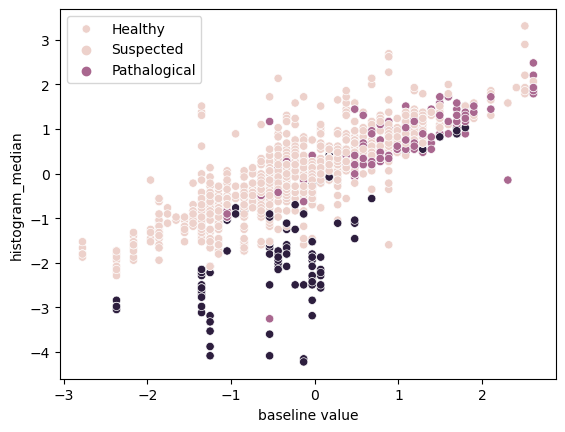

In [102]:
sns.scatterplot(data = train, x=train['baseline value'] , y=train['histogram_median'],hue = train['fetal_health'])
plt.legend(labels=['Healthy','Suspected','Pathalogical'])

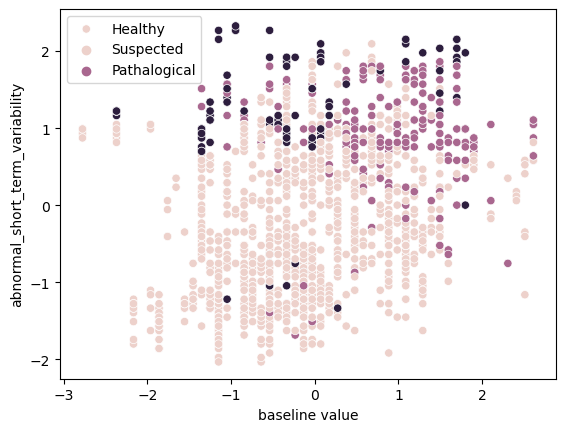

In [107]:
sns.scatterplot(data = train, x=train['baseline value'] , y=train['abnormal_short_term_variability'],hue = train['fetal_health'])
plt.legend(labels=['Healthy','Suspected','Pathalogical'])

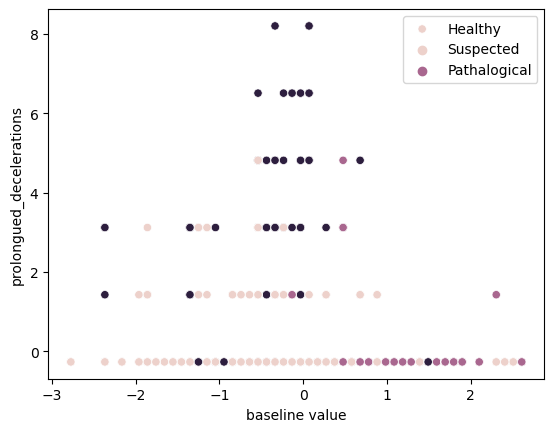

In [108]:
sns.scatterplot(data = train, x=train['baseline value'] , y=train['prolongued_decelerations'],hue = train['fetal_health'])
plt.legend(labels=['Healthy','Suspected','Pathalogical'])

Given the sheer number of explainitory variables we have, a linear SVM is unlikly to be the best fit. This is jsutified further by noticing that in our plots above, they lack a clear linear distiction between classes.

### Fit and train the data

In [134]:
X = train.drop(labels = ['fetal_health'],axis = 1)
y = train.fetal_health

clf = svm.SVC(kernel='linear')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print(p,r,f,s)

clf = svm.SVC(kernel='poly')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print(p,r,f,s)

[0.95177091 0.71548117 0.90298507] [0.95972644 0.71848739 0.82876712] [0.95573212 0.71698113 0.86428571] [1316  238  146]
[0.93578644 0.78947368 0.99193548] [0.98556231 0.6302521  0.84246575] [0.96002961 0.70093458 0.91111111] [1316  238  146]


### Run our polynomial model on test data

In [135]:
X_test = test.drop(labels = ['fetal_health'],axis = 1)
y_test = test.fetal_health

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print(p,r,f,s)

[0.92957746 0.6875     0.95652174] [0.97345133 0.57894737 0.73333333] [0.95100865 0.62857143 0.83018868] [339  57  30]


### Interpert our results
For predicting novel pathological diagonoses, we had a precision of 95%, a recall of 73% and an f-score of 83%. These figures are supported by 30 observations.

## Lets assume the doctors were right
And here we change any suspected case to be a pathological case and see what we can predict with more supporting observations.

In [143]:
notSus = babyData.copy()
# Magic formula to map 0->0 1->2 and 2->2
notSus['fetal_health'] = -1*babyData['fetal_health']**2 + 5*babyData['fetal_health'] -3
train, test = train_test_split(notSus, test_size=0.20)

X = train.drop(labels = ['fetal_health'],axis = 1)
y = train.fetal_health

clf = svm.SVC(kernel='poly')
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print(p,r,f,s)

[0.93290043 0.94267516] [0.98627002 0.76092545] [0.95884316 0.84210526] [1311  389]


In [144]:
X_test = test.drop(labels = ['fetal_health'],axis = 1)
y_test = test.fetal_health

y_pred = clf.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred)
print(p,r,f,s)

[0.93112948 0.9047619 ] [0.98255814 0.69512195] [0.95615276 0.7862069 ] [344  82]


By doing this, we were able to get a precision of 90%, a recall of 69% and an f-score of 78%. This kind of leand support to the idea that suspected and pathological truly are two seperate and distinct classes as the predicitive power of the model diminished when we made the assumption that the susprected cases were pathological.